## Content list:

#### 1. Import libraries & data 
#### 2. Create subsets & rename columns
#### 3. The elbow technique
#### 4. k-means clustering
#### 5. Export data

## 1. Import libraries & data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import warnings
warnings.filterwarnings("ignore")

In [2]:
# define path to csv file

path = r'/Users/jsok/US Education Analysis'

In [3]:
# read csv file

educ = pd.read_csv(os.path.join(path,'02 Data','states_all_new4.csv'), index_col=0)

In [4]:
educ.shape

(1646, 13)

In [5]:
educ.head()

,State,Year,Total_Revenue,Total_Expenditure,Net,Grade_PK,Grades_All,Grade_12,Avg_Math_4_Score,Avg_Math_8_Score,Avg_Reading_4_Score,Avg_Reading_8_Score,us_region
0,Alabama,1992,2678885.0,2653798.0,25087,8224.0,731634.0,41167.0,208.0,252.0,207.0,NaN,South
1,Alaska,1992,1049591.0,972488.0,77103,2371.0,122487.0,6714.0,NaN,NaN,NaN,NaN,West
2,Arizona,1992,3258079.0,3401580.0,-143501,2544.0,673477.0,37410.0,215.0,265.0,209.0,NaN,West
3,Arkansas,1992,1711959.0,1743022.0,-31063,808.0,441490.0,27651.0,210.0,256.0,211.0,NaN,South
4,California,1992,26260025.0,27138832.0,-878807,59067.0,5254844.0,270675.0,208.0,261.0,202.0,NaN,West


In [6]:
educ.isnull().sum()

State                     0
Year                      0
Total_Revenue           400
Total_Expenditure       400
Net                       0
Grade_PK                140
Grades_All               50
Grade_12                 50
Avg_Math_4_Score       1117
Avg_Math_8_Score       1081
Avg_Reading_4_Score    1036
Avg_Reading_8_Score    1121
us_region                 0
dtype: int64

## 2. Create subsets & rename columns

In [7]:
# rename column names

educ.rename(columns = {'Avg_Math_4_Score' : 'math4_score', 'Avg_Math_8_Score': 'math8_score', 'Avg_Reading_4_Score': 'reading4_score', 'Avg_Reading_8_Score': 'reading8_score'}, inplace = True)

In [8]:
educ.columns

Index(['State', 'Year', 'Total_Revenue', 'Total_Expenditure', 'Net',
       'Grade_PK', 'Grades_All', 'Grade_12', 'math4_score', 'math8_score',
       'reading4_score', 'reading8_score', 'us_region'],
      dtype='object')

In [9]:
# Create subset of only numeric columns in 'educ'

educ_numeric = educ[['Total_Revenue', 'Total_Expenditure', 'Net',
       'Grade_PK', 'Grades_All', 'Grade_12', 'math4_score', 'math8_score',
       'reading4_score', 'reading8_score']]

In [10]:
# Ensure subset contains non-NaN data

educ_numeric = educ_numeric[educ_numeric[['Total_Revenue']].notnull().all(1)
                    & educ_numeric[['Total_Expenditure']].notnull().all(1)
                    & educ_numeric[['Net']].notnull().all(1)
                    & educ_numeric[['Grade_PK']].notnull().all(1)
                    & educ_numeric[['Grades_All']].notnull().all(1)
                    & educ_numeric[['Grade_12']].notnull().all(1)
                    & educ_numeric[['math4_score']].notnull().all(1)
                    & educ_numeric[['math8_score']].notnull().all(1)
                    & educ_numeric[['reading4_score']].notnull().all(1)
                    & educ_numeric[['reading8_score']].notnull().all(1)]

# finances = educ[['State','Year','Total_Revenue','Total_Expenditure']] 
# enrollment = educ[['State', 'Year' ,'Grades_All']]
# test_scores = educ[['State', 'Year','math4_score','math8_score','reading4_score','reading8_score']]

In [11]:
educ_numeric.columns

Index(['Total_Revenue', 'Total_Expenditure', 'Net', 'Grade_PK', 'Grades_All',
       'Grade_12', 'math4_score', 'math8_score', 'reading4_score',
       'reading8_score'],
      dtype='object')

## 3. The elbow technique

In [12]:
# Define cluster range
# define k-means clusters in the range assigned

num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [13]:
# Creates a score that represents rate of variation for given clusters

score = [kmeans[i].fit(educ_numeric).score(educ_numeric) for i in range(len(kmeans))] 

score

[-1.1582554780705197e+17,
 -3.9207914553317064e+16,
 -1.4187928406115466e+16,
 -8044269482233099.0,
 -5483818263287369.0,
 -3788271020109250.0,
 -2869426455549309.0,
 -1993151814882702.5,
 -1538638559538111.8]

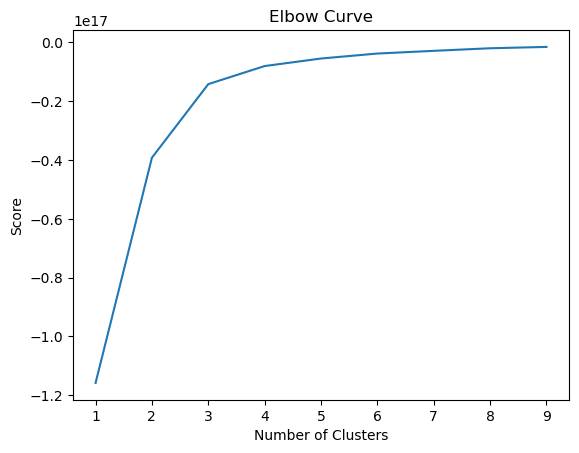

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The rate of variation takes a drastic turn when x = 3 and flattens out.  Since the elbow curve definitively bends here, 3 clusters is an optimal choice. 

## 4. k-means clustering

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [16]:
# Fit the k-means object to the data.

kmeans.fit(educ_numeric)

KMeans(n_clusters=3)

In [17]:
# create new column in 'educ_numeric' for clusters 

educ_numeric['clusters'] = kmeans.fit_predict(educ_numeric)

In [18]:
educ_numeric['clusters'].value_counts()

0    267
2     64
1     15
Name: clusters, dtype: int64

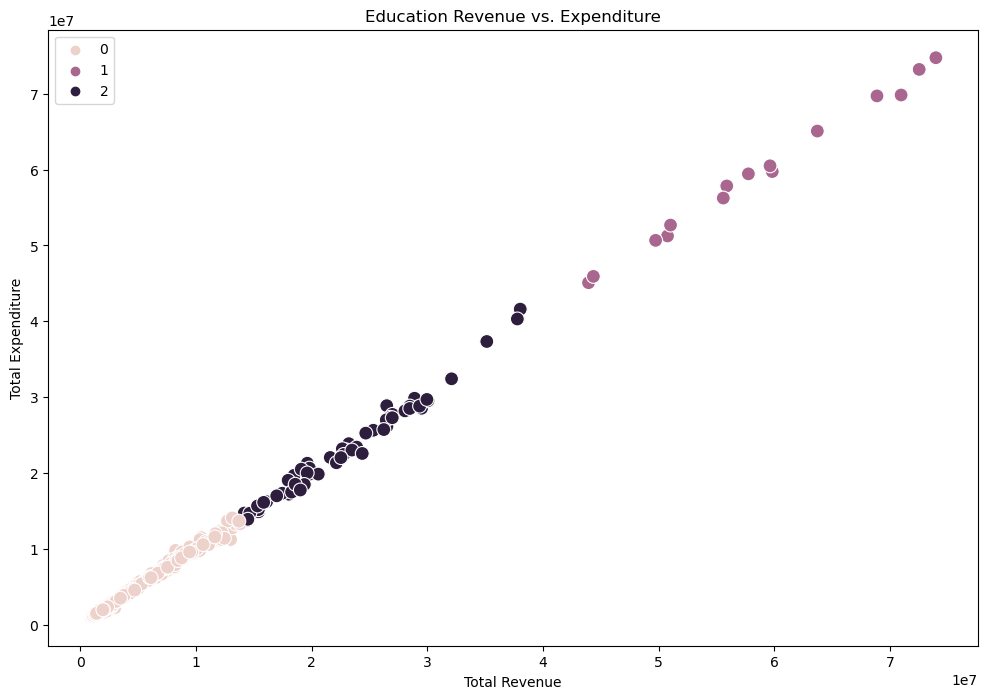

In [19]:
# Plot the clusters for the 'Total_Revenue' & 'Total_Expenditure'

plt.figure(figsize=(12,8))
scat1 = sns.scatterplot(x=educ_numeric['Total_Revenue'], y=educ_numeric['Total_Expenditure'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

scat1.grid(False) # This removes the grid from the background.
plt.title('Education Revenue vs. Expenditure') 
plt.xlabel('Total Revenue') # Label x-axis.
plt.ylabel('Total Expenditure') # Label y-axis.
plt.show()

##### When States are provided more Education funding, they are just as likely to spend it.  So the more money in, the more money out - a nearly linear relationship.  Additionally, Clusters here make logical sense.  The dark purple (2) data points are the most funded and spend the most in Education, followed by pink (0), and lastly purple (1).

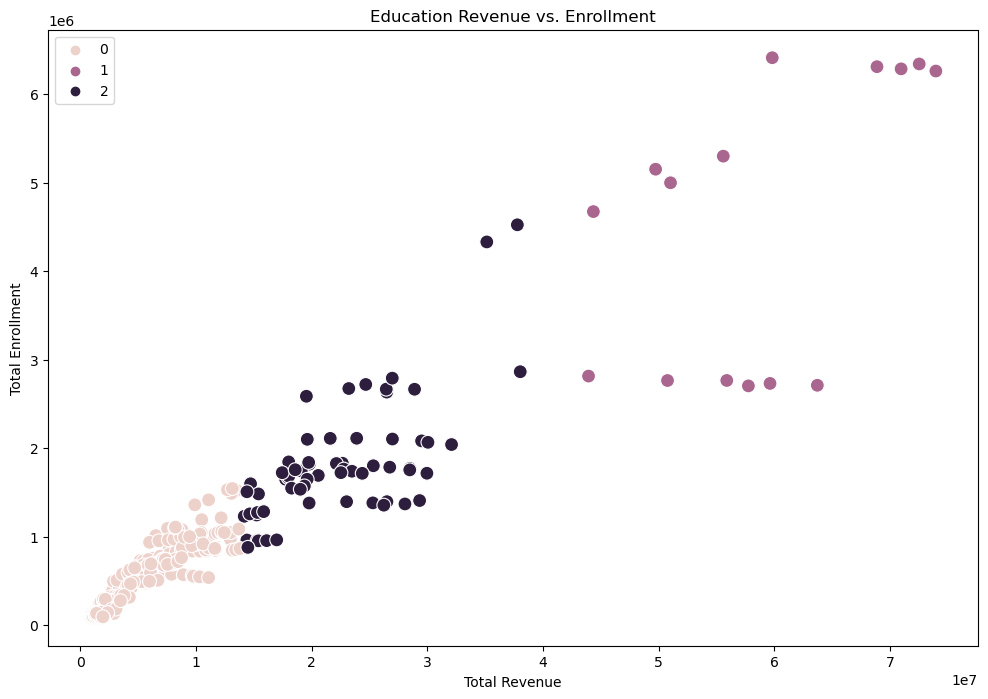

In [20]:
# Plot the clusters for the 'Total_Revenue' & 'Grades_All' (enrollment)

plt.figure(figsize=(12,8))
scat2 = sns.scatterplot(x=educ_numeric['Total_Revenue'], y=educ_numeric['Grades_All'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

scat2.grid(False) # This removes the grid from the background.
plt.title('Education Revenue vs. Enrollment') 
plt.xlabel('Total Revenue') # Label x-axis.
plt.ylabel('Total Enrollment') # Label y-axis.
plt.show()

##### The data is mostly linear, with a few outliers.  But the clusters here represent the high, medium and low funding received and its effect on total student enrollment.  These colored categories make sense for this analysis.

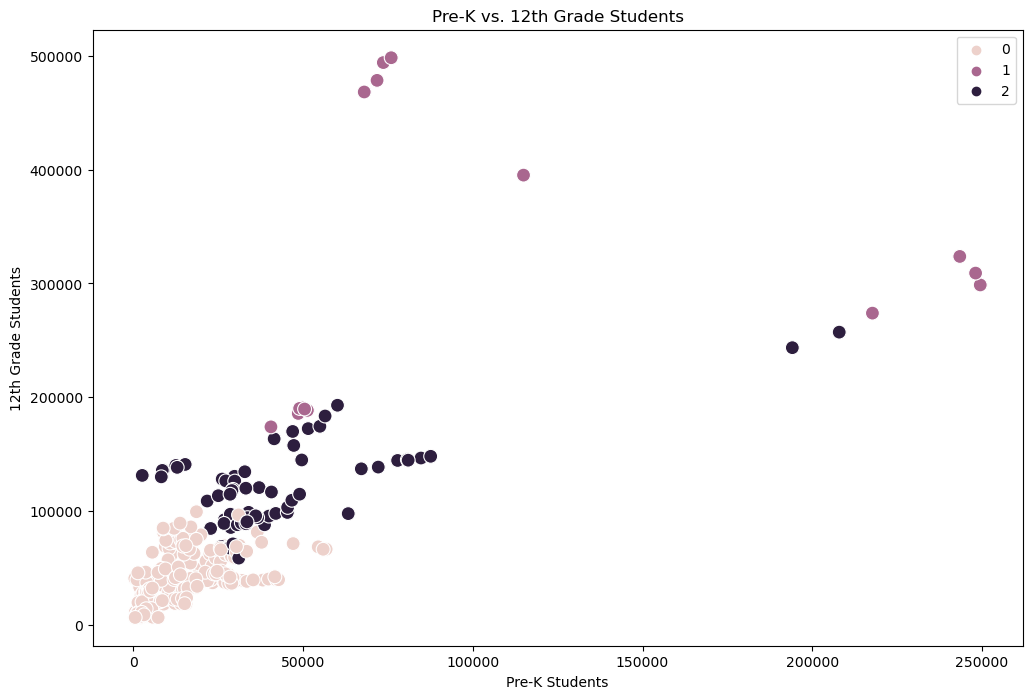

In [21]:
# Plot the clusters for the 'Grade_PK' & 'Grade_12'

plt.figure(figsize=(12,8))
scat3 = sns.scatterplot(x=educ_numeric['Grade_PK'], y=educ_numeric['Grade_12'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

scat3.grid(False) # This removes the grid from the background.
plt.title('Pre-K vs. 12th Grade Students') 
plt.xlabel('Pre-K Students') # Label x-axis.
plt.ylabel('12th Grade Students') # Label y-axis.
plt.show()

##### The clusters conveyed above are a bit mixed, with a generic pattern developing.  However, the pattern is not as storng as plenty of outilers are present.  Perhaps this visual is not as helpful because better-funded States do not always mean more enrollment in either Pre-K or 12th Grade.  Each school has different academic philosophies, which could result in small classroom instruction.

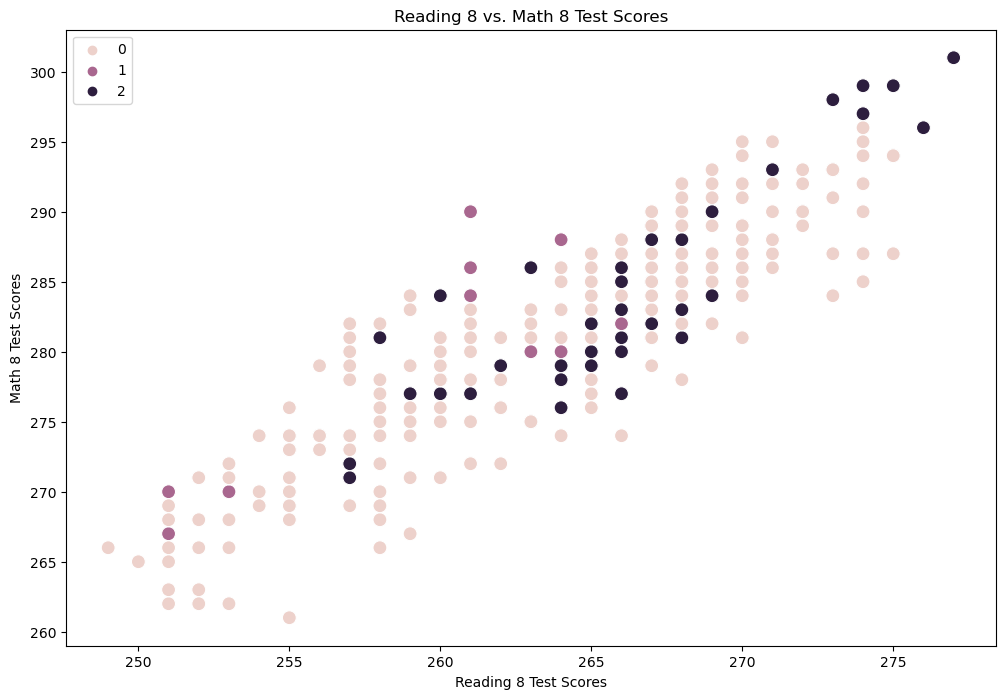

In [22]:
# Plot the clusters for the 'reading8_score' & 'math8_score'

plt.figure(figsize=(12,8))
scat4 = sns.scatterplot(x=educ_numeric['reading8_score'], y=educ_numeric['math8_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

scat4.grid(False) # This removes the grid from the background.
plt.title('Reading 8 vs. Math 8 Test Scores') 
plt.xlabel('Reading 8 Test Scores') # Label x-axis.
plt.ylabel('Math 8 Test Scores') # Label y-axis.
plt.show()

##### The pattern of this scatterplot is descriptive and helpful (moderately strong relationship - as Reading 8 Test Scores increase, Math 8 Test scores increase as well).  However, the clusters are mixed, which indicates these visuals do not make sense for this scatterplot.

In [23]:
# Give 3 cluster names

educ_numeric.loc[educ_numeric['clusters'] == 2, 'cluster'] = 'dark purple'
educ_numeric.loc[educ_numeric['clusters'] == 1, 'cluster'] = 'purple'
educ_numeric.loc[educ_numeric['clusters'] == 0, 'cluster'] = 'pink'

In [24]:
# descriptive stats for clusters

educ_numeric.groupby('cluster').agg({'Total_Revenue':['mean', 'median'], 
                         'Total_Expenditure':['mean', 'median'], 
                         'Grade_PK':['mean', 'median'],
                         'Grade_12':['mean', 'median'],
                         'Grades_All':['mean', 'median'],
                         'math8_score':['mean', 'median'],
                         'reading8_score':['mean', 'median']})

Total_Revenue             Total_Expenditure              \
                     mean      median              mean      median   
cluster                                                               
dark purple  2.219736e+07  21093645.0      2.237311e+07  21307378.5   
pink         5.540787e+06   4638125.0      5.561803e+06   4700494.0   
purple       5.856551e+07  57753776.0      5.947328e+07  59446908.0   

                  Grade_PK                Grade_12              Grades_All  \
                      mean   median           mean    median          mean   
cluster                                                                      
dark purple   43179.515625  33309.5  121606.609375  118369.0  1.816527e+06   
pink          12579.209738   9487.0   36619.752809   34629.0  5.358172e+05   
purple       110168.266667  71783.0  310540.333333  298637.0  4.549860e+06   

                       math8_score        reading8_score         
                median        mean median           mean median  
cluster                                                          
dark purple  1724010.0  283.703125  282.5     266.078125  266.0  
pink          494122.0  281.153558  283.0     263.797753  265.0  
purple       5000470.0  279.266667  280.0     260.466667  262.0

### Observations:
- Dark purple has the greatest revenue and expenditure (so, finances to spend on education) which leads to the greatest enrollment, on average.
- Though dark purple withholds the "better numbers" statistically speaking, their test scores are lower, on average, than pink and purple test scores.
- With less finances, pink and purple have been able to educate their students better than the dark purple students.

## 5. Export data & visualizations

In [25]:
# Export & save visualizations

scat1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','cluster_rev_vs_exp.png'))

scat2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','cluster_rev_vs_enrollment.png'))

scat3.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','cluster_prek_vs_12th.png'))

scat4.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','cluster_reading8_vs_math8.png'))

In [26]:
# Export csv file

educ_numeric.to_csv(os.path.join(path, '02 Data', 'states_all_kmeans_cluster.csv'))